Best Pairing - P1 Strat:(0, 0, 0) P2 Strat:(1, 0, 0) Win Pct: 0.99492
Best Pairing - P1 Strat:(0, 0, 1) P2 Strat:(1, 0, 0) Win Pct: 0.93496
Best Pairing - P1 Strat:(0, 1, 0) P2 Strat:(0, 0, 1) Win Pct: 0.80179
Best Pairing - P1 Strat:(0, 1, 1) P2 Strat:(0, 0, 1) Win Pct: 0.8837
Best Pairing - P1 Strat:(1, 0, 0) P2 Strat:(1, 1, 0) Win Pct: 0.88359
Best Pairing - P1 Strat:(1, 0, 1) P2 Strat:(1, 1, 0) Win Pct: 0.80193
Best Pairing - P1 Strat:(1, 1, 0) P2 Strat:(0, 1, 1) Win Pct: 0.93565
Best Pairing - P1 Strat:(1, 1, 1) P2 Strat:(0, 1, 1) Win Pct: 0.99506


Text(0.5, 1.0, 'Optimal Player 2 Strategies')

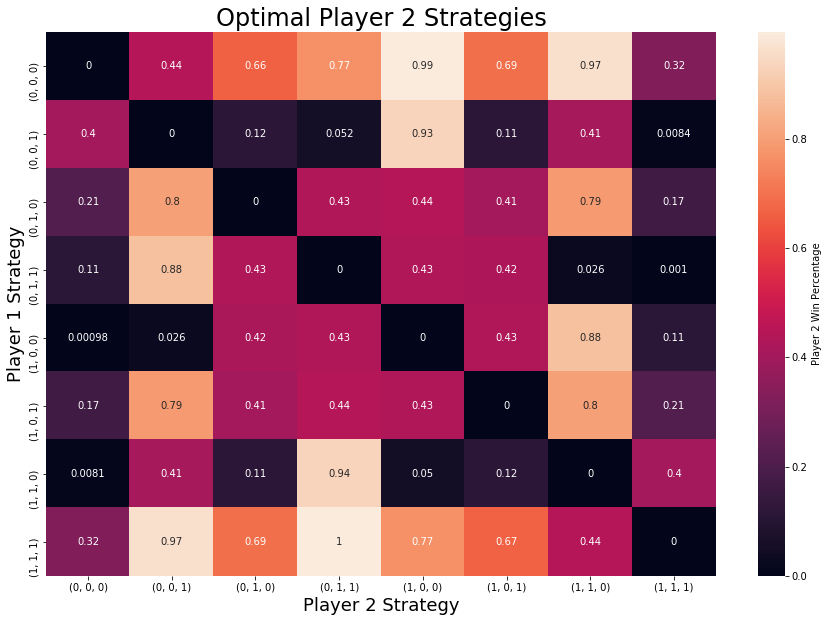

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
%matplotlib inline 

pTwoStrats = list(product([0,1],repeat=3))
pOneStrats = list(product([0,1],repeat=3))

responseTable = pd.DataFrame(columns=pTwoStrats)

samples = 100000

def generateDeck():

    deck = np.random.permutation(52) % 2

    return(deck)

sampleDecks = []
for s in range(samples):
    sampleDecks.append(generateDeck())

for pOneSet in pOneStrats:
    stratWinDict = dict()
    for pTwoSet in pTwoStrats:
        if pTwoSet == pOneSet:
            stratWinDict[pTwoSet] = 0
        else:
            wins = []
            for deck in sampleDecks:
                pOneTricks = 0
                pTwoTricks = 0
                countSinceTrick = 2
                for i in range(2, len(deck)):
                    if countSinceTrick >= 2:
                        lastThree = (deck[i-2], deck[i-1], deck[i])
                        if lastThree == pOneSet:
                            pOneTricks += 1
                            countSinceTrick = 0
                        elif lastThree == pTwoSet:
                            pTwoTricks += 1
                            countSinceTrick = 0

                    else:
                        countSinceTrick += 1

                wins.append(0 if pOneTricks >= pTwoTricks else 1)


            stratWinDict[pTwoSet] = sum(wins)/samples

    maximum = max(stratWinDict, key=stratWinDict.get)
    responseTable = responseTable.append(stratWinDict, ignore_index=True)
    print("Best Pairing - P1 Strat:" + str(pOneSet) +
          " P2 Strat:" + str(maximum) + " Win Pct: " +str(stratWinDict[maximum]))
responseTable.index = pOneStrats

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(responseTable, annot=True, cbar_kws={'label': 'Player 2 Win Percentage'})
plt.xlabel('Player 2 Strategy', fontsize=18)
plt.ylabel('Player 1 Strategy', fontsize=18)
plt.title('Optimal Player 2 Strategies', fontsize=24)